In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt

import sklearn.preprocessing as sk_preproc
import sklearn.cluster as sk_cluster

## Necessity to iterate

In this part we illustrate why it makes sense to iterates several times to compute the cluster centers.

In [30]:
rnd = np.random.RandomState(2021)
X = rnd.normal(0,1,(100,2))
n_rows = X.shape[0]
n_cols = X.shape[1]
n_clusters = 4
idx = rnd.randint(n_rows, size=n_clusters)
clusters = X[idx, :]
labels = np.zeros(n_rows)
n_iter = 10
labels_investigate = []
clusters_investigate = []
for j in range(n_iter):
    for i in range(n_rows):
        distance_clusters = np.linalg.norm(X[i, :]-clusters, axis=1)
        idx_cluster = np.argmin(distance_clusters)
        labels[i] = idx_cluster
    labels_investigate.append(labels.copy())
    clusters_investigate.append(clusters.copy())
    
    for k in range(n_clusters):
        cluster = X[np.where(labels==k)[0],:]
        clusters[k,:] = np.mean(cluster, axis=0)

In [31]:
labels = labels_investigate[0]
clusters = clusters_investigate[0]
fig = go.Figure()
# cluster 0
cluster_1 = np.where(labels==0)
fig.add_trace(go.Scatter(x=X[cluster_1][:,0], y=X[cluster_1][:,1], mode='markers', name='cluster 0'))
# cluster 1
cluster_1 = np.where(labels==1)
fig.add_trace(go.Scatter(x=X[cluster_1][:,0], y=X[cluster_1][:,1], mode='markers', name='cluster 1'))
# cluster 2
cluster_2 = np.where(labels==2)
fig.add_trace(go.Scatter(x=X[cluster_2][:,0], y=X[cluster_2][:,1], mode='markers', name='cluster 2'))
# cluster 3
cluster_3 = np.where(labels==3)
fig.add_trace(go.Scatter(x=X[cluster_3][:,0], y=X[cluster_3][:,1], mode='markers', name='cluster 3'))
# initial clusters
fig.add_trace(go.Scatter(x=clusters[:,0], y=clusters[:,1], mode='markers', name='init clusters',
                        marker=dict(size=20)))


fig.show()

We note here that some clusters have very weird shapes: cluster 2 is very flat. The reason is that the initial cluster centers (from random selection) are badly distributed.

In [33]:
labels = labels_investigate[9]
clusters = clusters_investigate[9]
fig = go.Figure()
# cluster 0
cluster_1 = np.where(labels==0)
fig.add_trace(go.Scatter(x=X[cluster_1][:,0], y=X[cluster_1][:,1], mode='markers', name='cluster 0'))
# cluster 1
cluster_1 = np.where(labels==1)
fig.add_trace(go.Scatter(x=X[cluster_1][:,0], y=X[cluster_1][:,1], mode='markers', name='cluster 1'))
# cluster 2
cluster_2 = np.where(labels==2)
fig.add_trace(go.Scatter(x=X[cluster_2][:,0], y=X[cluster_2][:,1], mode='markers', name='cluster 2'))
# cluster 3
cluster_3 = np.where(labels==3)
fig.add_trace(go.Scatter(x=X[cluster_3][:,0], y=X[cluster_3][:,1], mode='markers', name='cluster 3'))
# initial clusters
fig.add_trace(go.Scatter(x=clusters[:,0], y=clusters[:,1], mode='markers', name='init clusters',
                        marker=dict(size=20)))


fig.show()

Here the 4 shapes look well shaped. The four cluster centers are well distributed in the plot.

## Algo comparison with sklearn

Note: the inertia is just the sum of all distances between the points and their associated cluster.

In [12]:
rnd = np.random.RandomState(0)
X = rnd.normal(0,1,(100,2))

In [13]:
rnd = np.random.RandomState(0)
n_rows = X.shape[0]
n_cols = X.shape[1]
n_clusters = 4
# seeds = rnd.randint(n_rows, size=n_clusters)
seeds = rnd.permutation(n_rows)[:n_clusters] # to match with scikit-learn
cluster_centers = X[seeds, :]
labels = np.zeros(n_rows)
n_iter = 10
total_inertia = []
distances_best_cluster = []
for j in range(n_iter):
    distances_best_cluster = []
    for i in range(n_rows):
        distance_clusters = np.linalg.norm(X[i, :]-cluster_centers, axis=1)
        idx_cluster = np.argmin(distance_clusters)
        labels[i] = idx_cluster
        distances_best_cluster.append(np.linalg.norm(X[i, :]-cluster_centers[idx_cluster]))
    total_inertia.append(np.sum(distances_best_cluster))
    
    for k in range(n_clusters):
        cluster_center = X[np.where(labels==k)[0],:]
        cluster_centers[k,:] = np.mean(cluster_center, axis=0)
cluster_centers

array([[-0.94434496, -0.12325803],
       [ 0.57276717, -0.15791944],
       [ 1.33962769, -1.31892304],
       [ 0.48709951,  1.37584637]])

In [25]:
fig = go.Figure()
# cluster 0
cluster_1 = np.where(labels==0)
fig.add_trace(go.Scatter(x=X[cluster_1][:,0], y=X[cluster_1][:,1], mode='markers', name='cluster 0'))
# cluster 1
cluster_1 = np.where(labels==1)
fig.add_trace(go.Scatter(x=X[cluster_1][:,0], y=X[cluster_1][:,1], mode='markers', name='cluster 1'))
# cluster 2
cluster_2 = np.where(labels==2)
fig.add_trace(go.Scatter(x=X[cluster_2][:,0], y=X[cluster_2][:,1], mode='markers', name='cluster 2'))
# cluster 3
cluster_3 = np.where(labels==3)
fig.add_trace(go.Scatter(x=X[cluster_3][:,0], y=X[cluster_3][:,1], mode='markers', name='cluster 3'))
# final clusters
fig.add_trace(go.Scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], mode='markers', name='final clusters',
                        marker=dict(size=20)))


fig.show()

In [15]:
sk_kmeans = sk_cluster.KMeans(n_clusters=4, 
                max_iter=10, 
                random_state=0, 
                init='random', 
                n_init=1,
                verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 194.15960418221107
Iteration 1, inertia 91.58850870127334
Iteration 2, inertia 87.63622195589335
Iteration 3, inertia 87.28595138269583
Converged at iteration 3: strict convergence.


In [26]:
labels = sk_kmeans.labels_
clusters = sk_kmeans.cluster_centers_

fig = go.Figure()
# cluster 0
cluster_1 = np.where(labels==0)
fig.add_trace(go.Scatter(x=X[cluster_1][:,0], y=X[cluster_1][:,1], mode='markers', name='cluster 0'))
# cluster 1
cluster_1 = np.where(labels==1)
fig.add_trace(go.Scatter(x=X[cluster_1][:,0], y=X[cluster_1][:,1], mode='markers', name='cluster 1'))
# cluster 2
cluster_2 = np.where(labels==2)
fig.add_trace(go.Scatter(x=X[cluster_2][:,0], y=X[cluster_2][:,1], mode='markers', name='cluster 2'))
# cluster 3
cluster_3 = np.where(labels==3)
fig.add_trace(go.Scatter(x=X[cluster_3][:,0], y=X[cluster_3][:,1], mode='markers', name='cluster 3'))
# final clusters
fig.add_trace(go.Scatter(x=clusters[:,0], y=clusters[:,1], mode='markers', name='final clusters',
                        marker=dict(size=20)))


fig.show()

In [17]:
print('My method:')
print(cluster_centers)
print('Scikit learn:')
print(sk_kmeans.cluster_centers_)
print()
print('---')
print()
print('My method:')
print(total_inertia[-1])
print('Scikit learn:')
print(sk_kmeans.inertia_)

My method:
[[-0.94434496 -0.12325803]
 [ 0.57276717 -0.15791944]
 [ 1.33962769 -1.31892304]
 [ 0.48709951  1.37584637]]
Scikit learn:
[[-0.94434496 -0.12325803]
 [ 0.57276717 -0.15791944]
 [ 1.33962769 -1.31892304]
 [ 0.48709951  1.37584637]]

---

My method:
81.9475492889284
Scikit learn:
87.28595138269583


## Final algo

In [63]:
# TODO: keep labels with best inertia scores!

class MyKMeans():
    def __init__(self, n_clusters, n_iter):
        self.n_clusters = n_clusters
        self.n_iter = n_iter
    
    def fit(self,X):
        
        n_rows = X.shape[0]
        n_cols = X.shape[1]
        
        # initiate cluster centers
        seeds = rnd.permutation(n_rows)[:self.n_clusters]
        cluster_centers = X[seeds, :]
        labels = np.zeros(n_rows)
        
        inertia_all = []
        distances_best_cluster = []
        for j in range(self.n_iter):
            distances_best_cluster = []
            # 1- loop on all observations to find closest clusters
            for i in range(n_rows):
                distance_clusters = np.linalg.norm(X[i, :]-cluster_centers, axis=1)
                idx_cluster = np.argmin(distance_clusters)
                labels[i] = idx_cluster
                distances_best_cluster.append(np.linalg.norm(X[i, :]-cluster_centers[idx_cluster]))
            inertia_all.append(np.sum(distances_best_cluster))
            
            # 2- loop on all clusters to compute updated cluster centers
            for k in range(self.n_clusters):
                cluster_center = X[np.where(labels==k)[0],:]
                cluster_centers[k,:] = np.mean(cluster_center, axis=0)
        return labels, cluster_centers, inertia_all

## Business use case

In [84]:
n_clients = 10

In [85]:
client_id = ['cl_' + str(i) for i in range(n_clients)]

In [86]:
df_clients = pd.DataFrame({'id':client_id}).set_index('id')

In [87]:
# df_clients['cash'] = np.random.normal(50,20, n_clients)
df_clients['aum'] = np.random.normal(100,30, n_clients)
df_clients['trx'] = np.random.normal(24,10, n_clients)

In [88]:
X = sk_preproc.StandardScaler().fit_transform(df_clients)

In [136]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X[:,0], y=X[:,1], mode='markers', name='clients',
                        marker=dict(size=10)))
fig.update_layout(
    xaxis_title="AUM",
    yaxis_title="TRX",
)
fig.show()

We clearly have 2 outliers: those clients either have a very high or very low AUM.

We have could identify 5 groups of clients: :

- Very high AUM and low trades
- Very low AUM and low trades
- Low AUM and high trades
- Low AUM and low trades
- Medium AUM and medium trades

*2 clusters*

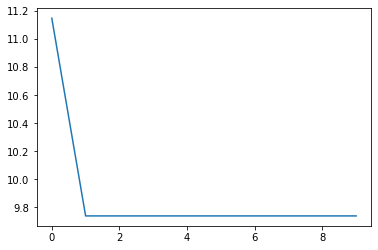

final inertia 9.73953615860264


In [129]:
n_clusters = 2
mykm = MyKMeans(n_clusters=n_clusters, n_iter=10)
labels_business, cluster_centers_business, inertia_all_business = mykm.fit(X)

labels = labels_business
clusters = cluster_centers_business

fig = go.Figure()
# final clusters
fig.add_trace(go.Scatter(x=clusters[:,0], y=clusters[:,1], mode='markers', name='final clusters',
                        marker=dict(size=20)))
for i in range(n_clusters):
    cluster = np.where(labels==i)
    fig.add_trace(go.Scatter(x=X[cluster][:,0], y=X[cluster][:,1], mode='markers', name='cluster ' + str(i)))

fig.update_layout(
    xaxis_title="AUM",
    yaxis_title="TRX",
)
fig.show()
plt.plot(np.arange(len(inertia_all_business)), inertia_all_business)
plt.show()
print('final inertia {}'.format(inertia_all_business[-1]))

*3 clusters*

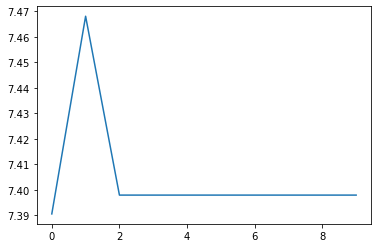

final inertia 7.397871049682393


In [130]:
n_clusters = 3
mykm = MyKMeans(n_clusters=n_clusters, n_iter=10)
labels_business, cluster_centers_business, inertia_all_business = mykm.fit(X)

labels = labels_business
clusters = cluster_centers_business

fig = go.Figure()
# final clusters
fig.add_trace(go.Scatter(x=clusters[:,0], y=clusters[:,1], mode='markers', name='final clusters',
                        marker=dict(size=20)))
for i in range(n_clusters):
    cluster = np.where(labels==i)
    fig.add_trace(go.Scatter(x=X[cluster][:,0], y=X[cluster][:,1], mode='markers', name='cluster ' + str(i)))

fig.update_layout(
    xaxis_title="AUM",
    yaxis_title="TRX",
)
fig.show()
plt.plot(np.arange(len(inertia_all_business)), inertia_all_business)
plt.show()
print('final inertia {}'.format(inertia_all_business[-1]))

*4 clusters*

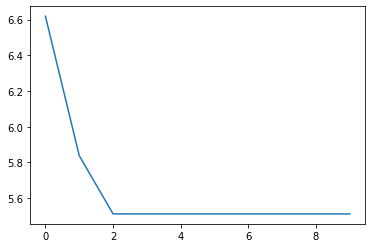

final inertia 5.511519688602474


In [131]:
n_clusters = 4
mykm = MyKMeans(n_clusters=n_clusters, n_iter=10)
labels_business, cluster_centers_business, inertia_all_business = mykm.fit(X)

labels = labels_business
clusters = cluster_centers_business

fig = go.Figure()
# final clusters
fig.add_trace(go.Scatter(x=clusters[:,0], y=clusters[:,1], mode='markers', name='final clusters',
                        marker=dict(size=20)))
for i in range(n_clusters):
    cluster = np.where(labels==i)
    fig.add_trace(go.Scatter(x=X[cluster][:,0], y=X[cluster][:,1], mode='markers', name='cluster ' + str(i)))

fig.update_layout(
    xaxis_title="AUM",
    yaxis_title="TRX",
)
fig.show()
plt.plot(np.arange(len(inertia_all_business)), inertia_all_business)
plt.show()
print('final inertia {}'.format(inertia_all_business[-1]))

*X clusters*

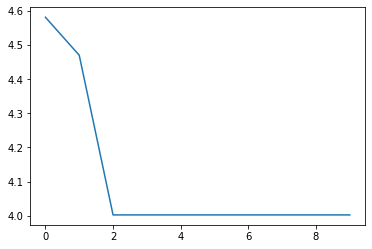

final inertia 4.002546527939795


In [138]:
n_clusters = 5
mykm = MyKMeans(n_clusters=n_clusters, n_iter=10)
labels_business, cluster_centers_business, inertia_all_business = mykm.fit(X)

labels = labels_business
clusters = cluster_centers_business

fig = go.Figure()
# final clusters
fig.add_trace(go.Scatter(x=clusters[:,0], y=clusters[:,1], mode='markers', name='final clusters',
                        marker=dict(size=20)))
for i in range(n_clusters):
    cluster = np.where(labels==i)
    fig.add_trace(go.Scatter(x=X[cluster][:,0], y=X[cluster][:,1], mode='markers', name='cluster ' + str(i)))

fig.update_layout(
    xaxis_title="AUM",
    yaxis_title="TRX",
)
fig.show()
plt.plot(np.arange(len(inertia_all_business)), inertia_all_business)
plt.show()
print('final inertia {}'.format(inertia_all_business[-1]))